## Initialize

In [4]:
from cmbagent import CMBAgent
import os
# Create an instance (with your preferred parameters)
cmbagent = CMBAgent()
# Now clear the cache
cmbagent.clear_cache()
cmbagent = CMBAgent( make_vector_stores=['classy_sz'],
                    agent_llm_configs={
                    'engineer': {
                        "model": "deepseek-chat",
                        "reasoning_effort": "high",
                        "api_key": os.getenv("DEEPSEEK_API_KEY"),
                        "api_type": "deepseek",
                        "base_url": "https://api.deepseek.com/v1",
                        },
                    'planner': {
                        "model": "deepseek-reasoner",
                        "api_key": os.getenv("DEEPSEEK_API_KEY"),
                        "api_type": "deepseek",
                         "base_url": "https://api.deepseek.com/v1",
                        },
                    'researcher': {
                        "model": "deepseek-chat",
                        "api_key": os.getenv("DEEPSEEK_API_KEY"),
                        "api_type": "deepseek",
                         "base_url": "https://api.deepseek.com/v1",
                        },
                    
                    # 'plan_reviewer': {
                    #     "model": "deepseek-chat",
                    #     "api_key": os.getenv("DEEPSEEK_API_KEY"),
                    #     "api_type": "deepseek",
                    #      "base_url": "https://api.deepseek.com/v1",
                    #     },
                    # 'plan_recorder': {
                    #     "model": "deepseek-chat",
                    #     "api_key": os.getenv("DEEPSEEK_API_KEY"),
                    #     "api_type": "deepseek",
                    #      "base_url": "https://api.deepseek.com/v1",
                    #     },

                    # 'control': {
                    #     "model": "deepseek-chat",
                    #     "api_key": os.getenv("DEEPSEEK_API_KEY"),
                    #     "api_type": "deepseek",
                    #      "base_url": "https://api.deepseek.com/v1",
                    #     },
        # ... other agents
    },)

Updating vector store for classy_sz_agent
No vector stores found with the name 'classy_sz_agent_store'.
Files to upload:
	 - classy_sz_cmb_cls.md
	 - classy_sz_matter_power_spectrum.md
completed
FileCounts(cancelled=0, completed=2, failed=0, in_progress=0, total=2)
classy_sz_agent: uploaded assistant data to vector store with id:  vs_67d3881e73008191a69753b97a2a7c28


vector stores updated
'classy_sz_agent': 'vs_67d3881e73008191a69753b97a2a7c28',


In [5]:
# BadRequestError: Error code: 400 - {'error': {'message': 'deepseek-reasoner does not support Function Calling', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}
# UnprocessableEntityError: Failed to deserialize the JSON body into the target type: response_format: response_format.type `json_schema` is unavailable now at line 1 column 2704

## Solve

Message from admin:




Task: Compute and plot cmb temperature cls.



Calling planner...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
deepseek-reasoner,planner,0.00000,306,2916,3222


Message from planner:




Forwarding content for formatting...



Calling planner_response_formatter...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,planner_response_formatter,0.00019,425,205,630


Message from planner_response_formatter:




**PLAN**

- Step 1:
	* sub-task: Research how to compute CMB temperature Cls using the `classy_sz` package
	* agent in charge: classy_sz_agent

	* instructions:
		- Search the `classy_sz` documentation for functions and parameters required to compute CMB temperature angular power spectra (Cls).
		- Identify input cosmological parameters (e.g., Ω_b, Ω_cdm, H₀) and any necessary configuration settings.
		- Verify if there are example workflows or code snippets for generating Cls in the package’s documentation.

- Step 2:
	* sub-task: Implement and plot the Cls
	* agent in charge: engineer

	* instructions:
		- Write a Python script to initialize the `classy_sz` cosmology module with parameters from Step 1.
		- Compute the temperature Cls using the appropriate function (e.g., `compute_cl()` or equivalent).
		- Plot the results (e.g., multipole ℓ vs. Cl_tt) using matplotlib and save the figure as a PNG/PDF.

        


Calling plan_recorder...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,plan_recorder,0.00027,730,260,990


Message from plan_recorder:



Planning stage complete. Switching to control.


Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,control,0.00025,1588,16,1604


Message from control:



Transitioning to classy_sz_agent!


Calling classy_sz_agent...



Model,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini,0.00105,4273,679,4952


Message from classy_sz_agent:




Forwarding content for formatting...



Calling classy_sz_response_formatter...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,classy_sz_response_formatter,0.00057,1714,522,2236


Message from classy_sz_response_formatter:




**File Search Task:**

Research how to compute CMB temperature Cls using the `classy_sz` package

**File Consulted:**

classy_sz_cmb_cls.md

**Results:**

1. **Initialization**: You need to initialize the `classy_sz` class and call the `initialize_classy_szfast()` method.
2. **Cosmological Parameters**: The parameters required include:
   - \( A_s \): Amplitude of the primordial power spectrum
   - \( n_s \): Spectral index
   - \( h \): Dimensionless Hubble parameter
   - \( \omega_b \): Baryon density parameter
   - \( \omega_{cdm} \): Cold dark matter density parameter
   - \( \tau_{reio} \): Reionization optical depth
3. **Computing Cls**: Use the `get_cmb_cls()` method to compute the CMB power spectra.
4. **Plotting**: You can plot the results using matplotlib.


**Python Code:**

```python
import numpy as np
import matplotlib.pyplot as plt
from classy_sz import Class as Class_sz

# Initialize classy_sz
classy_sz = Class_sz()
classy_sz.initialize_classy_szfast()  # Initialization is crucial!

# Set cosmological parameters
params = {
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'tau_reio': 0.06
}

# Compute CMB power spectra
cls = classy_sz.get_cmb_cls(params_values_dict=params)
ell = cls['ell']
cl_tt = cls['tt']

# Plot the CMB temperature power spectrum
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl_tt / (2 * np.pi), label='TT')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/(2\pi)$')
plt.title('CMB Temperature Power Spectrum')
plt.legend()
plt.grid(True)
plt.show()
```
    


Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,control,0.00049,2772,128,2900


Message from control:




**Step number:** 1 out of 2.
 
**Sub-task:** Research how to compute CMB temperature Cls using the `classy_sz` package
 
**Agent in charge of sub-task:** `classy_sz_agent`
 
**Instructions:**
 
Search the `classy_sz` documentation for functions and parameters required to compute CMB temperature angular power spectra (Cls). Identify input cosmological parameters (e.g., Ω_b, Ω_cdm, H₀) and any necessary configuration settings. Verify if there are example workflows or code snippets for generating Cls in the package’s documentation.
 
**Status:** completed ✅
    


Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,control,0.00048,3125,14,3139


Message from control:



Transitioning to engineer!


Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
deepseek-chat,engineer,0.00153,3481,540,4021


Message from engineer:




Forwarding content for formatting...



Calling engineer_response_formatter...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,engineer_response_formatter,0.00082,3186,573,3759


Message from engineer_response_formatter:



**Code Explanation:**

The following Python code initializes the `classy_sz` package, sets the necessary cosmological parameters, computes the CMB temperature Cls, and plots the results. The code ensures proper LaTeX rendering, detailed labeling, and grid lines. The plot is saved as a high-resolution PNG file in the `data/` folder. 1. **Initialization**: The `Class_sz` class is instantiated, and the initialization method is called. 2. **Setting Parameters**: A dictionary of cosmological parameters is created. 3. **Computing Cls**: The `get_cmb_cls()` method is called with the parameters to obtain the Cls. 4. **Plotting**: The results are plotted using matplotlib, showing the multipole moment \( \ell \) against the CMB temperature power spectrum.

**Python Code:**

```python
# filename: codebase/compute_cmb_temperature_cls.py
import numpy as np
import matplotlib.pyplot as plt
from classy_sz import Class as Class_sz
import os

# Ensure the data directory exists
os.makedirs('data', exist_ok=True)

# Initialize classy_sz
classy_sz = Class_sz()
classy_sz.initialize_classy_szfast()  # Initialization is crucial!

# Set cosmological parameters
params = {
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'tau_reio': 0.06
}

# Compute CMB power spectra
cls = classy_sz.get_cmb_cls(params_values_dict=params)
ell = cls['ell']
cl_tt = cls['tt']

# Plot the CMB temperature power spectrum
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl_tt / (2 * np.pi), label='TT')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/(2\pi)$')
plt.title('CMB Temperature Power Spectrum')
plt.legend()
plt.grid(True)

# Save the plot to a high-resolution PNG file
plt.savefig('data/cmb_temperature_cls.png', dpi=300, bbox_inches='tight')
plt.close()
```


Calling executor...

Message from executor:

execution succeeded

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,control,0.00070,4223,116,4339


Message from control:



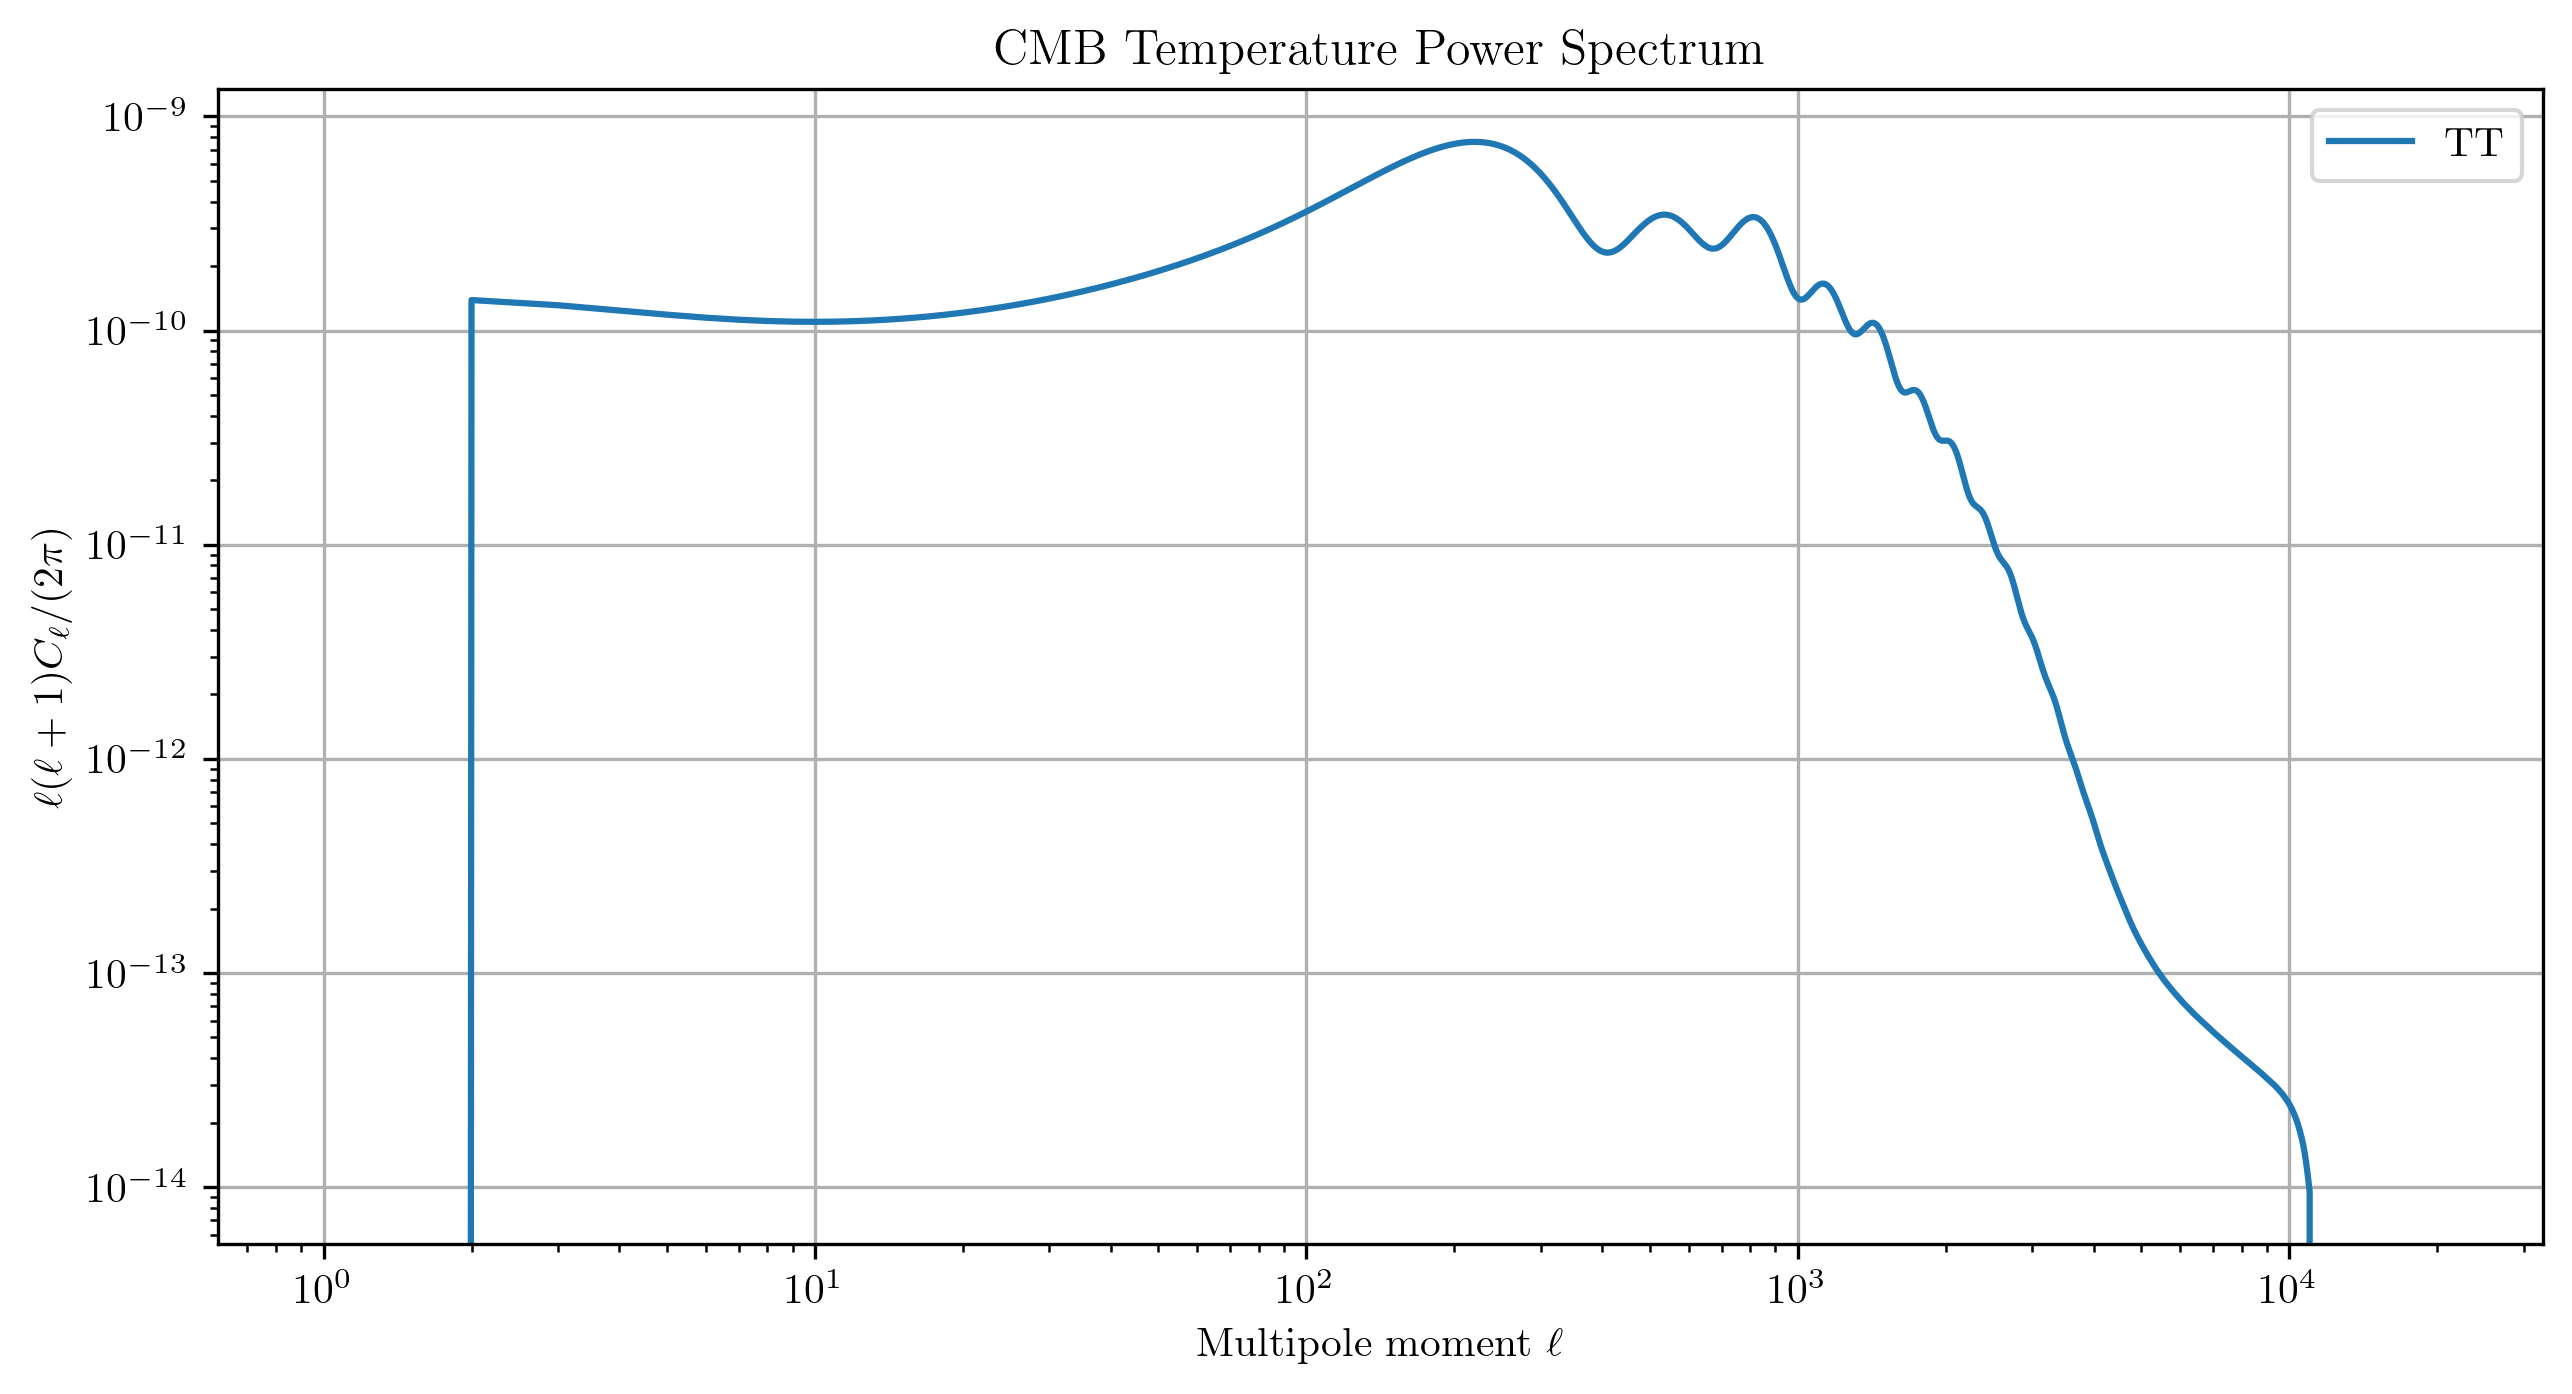


**Step number:** 2 out of 2.
 
**Sub-task:** Implement and plot the Cls
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
Write a Python script to initialize the `classy_sz` cosmology module with parameters from Step 1. Compute the temperature Cls using the appropriate function (e.g., `compute_cl()` or equivalent). Plot the results (e.g., multipole ℓ vs. Cl_tt) using matplotlib and save the figure as a PNG/PDF.
 
**Status:** completed ✅
    


Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-mini-2024-07-18,control,0.00068,4454,13,4467


Message from control:



Transitioning to admin!


Calling admin...



In [6]:
task = r"""
Task: Compute and plot cmb temperature cls.
"""

cmbagent.solve(task,
               max_rounds=500,
               shared_context = {'feedback_left': 0,
                                 'maximum_number_of_steps_in_plan': 3})

In [9]:
# Create a dummy groupchat attribute if it doesn't exist
if not hasattr(cmbagent, 'groupchat'):
    Dummy = type('Dummy', (object,), {'new_conversable_agents': []})
    cmbagent.groupchat = Dummy()

# Now call display_cost without triggering the AttributeError
cmbagent.display_cost()


,Agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
0,classy sz,0.001048,4273.0,679.0,4952.0
1,planner response formatter,0.000187,425.0,205.0,630.0
2,engineer response formatter,0.000822,3186.0,573.0,3759.0
3,planner,0.000000,306.0,2916.0,3222.0
4,plan recorder,0.000265,730.0,260.0,990.0
5,classy sz response formatter,0.000570,1714.0,522.0,2236.0
6,control,0.002596,16162.0,287.0,16449.0
7,engineer,0.001534,3481.0,540.0,4021.0
Total,NaN,0.007023,30277.0,5982.0,36259.0


## Context